In [16]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from scipy.stats import zscore, iqr
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Charger le fichier CSV
file_path = 'bank-full.csv'
data = pd.read_csv(file_path, sep=';')

# Examinez les premières lignes et les informations sur les colonnes
print(data.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [17]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [18]:

# Vérifier s'il y a des valeurs manquantes
print("Nombre de valeurs manquantes par colonne :\n", data.isnull().sum())

# Supprimer les colonnes 'day' et 'month' si elles ne sont pas utiles pour l'analyse
data = data.drop(columns=['day', 'month','contact','default'])


Nombre de valeurs manquantes par colonne :
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [19]:
# Identifier et traiter les valeurs aberrantes par exemple pour la variable 'balance'
z_scores = zscore(data['balance'])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3)  # Définir le seuil des écarts-types
data.loc[outliers, 'balance'] = data['balance'].median()  
print(data.head())


   age           job  marital  education  balance housing loan  duration  \
0   58    management  married   tertiary     2143     yes   no       261   
1   44    technician   single  secondary       29     yes   no       151   
2   33  entrepreneur  married  secondary        2     yes  yes        76   
3   47   blue-collar  married    unknown     1506     yes   no        92   
4   33       unknown   single    unknown        1      no   no       198   

   campaign  pdays  previous poutcome   y  
0         1     -1         0  unknown  no  
1         1     -1         0  unknown  no  
2         1     -1         0  unknown  no  
3         1     -1         0  unknown  no  
4         1     -1         0  unknown  no  


In [20]:
# Identifier les variables numériques
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Calculer la variance uniquement pour les variables numériques
low_variance_cols = [col for col in numerical_cols if data[col].var() < 0.1]
data.drop(low_variance_cols, axis=1, inplace=True)  
print(data.head())

   age           job  marital  education  balance housing loan  duration  \
0   58    management  married   tertiary     2143     yes   no       261   
1   44    technician   single  secondary       29     yes   no       151   
2   33  entrepreneur  married  secondary        2     yes  yes        76   
3   47   blue-collar  married    unknown     1506     yes   no        92   
4   33       unknown   single    unknown        1      no   no       198   

   campaign  pdays  previous poutcome   y  
0         1     -1         0  unknown  no  
1         1     -1         0  unknown  no  
2         1     -1         0  unknown  no  
3         1     -1         0  unknown  no  
4         1     -1         0  unknown  no  


In [21]:
# Identifier les variables numériques avec très haute variance
high_variance_cols = [col for col in data.columns if data[col].dtype in [np.float64, np.int64] and data[col].var() > 1000000]

# Normalisation Min-Max des variables avec très haute variance
scaler = MinMaxScaler()
data[high_variance_cols] = scaler.fit_transform(data[high_variance_cols])
print(data.head())


   age           job  marital  education   balance housing loan  duration  \
0   58    management  married   tertiary  0.518754     yes   no       261   
1   44    technician   single  secondary  0.396769     yes   no       151   
2   33  entrepreneur  married  secondary  0.395211     yes  yes        76   
3   47   blue-collar  married    unknown  0.481997     yes   no        92   
4   33       unknown   single    unknown  0.395153      no   no       198   

   campaign  pdays  previous poutcome   y  
0         1     -1         0  unknown  no  
1         1     -1         0  unknown  no  
2         1     -1         0  unknown  no  
3         1     -1         0  unknown  no  
4         1     -1         0  unknown  no  


In [22]:
numeric_summary = data.describe()
print("Résumé statistique des variables numériques :")
print(numeric_summary)


Résumé statistique des variables numériques :
                age       balance      duration      campaign         pdays  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210      0.457072    258.163080      2.763841     40.197828   
std       10.618762      0.098601    257.527812      3.098021    100.128746   
min       18.000000      0.000000      0.000000      1.000000     -1.000000   
25%       33.000000      0.399250    103.000000      1.000000     -1.000000   
50%       39.000000      0.420946    180.000000      2.000000     -1.000000   
75%       48.000000      0.471379    319.000000      3.000000     -1.000000   
max       95.000000      1.000000   4918.000000     63.000000    871.000000   

           previous  
count  45211.000000  
mean       0.580323  
std        2.303441  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      275.000000  


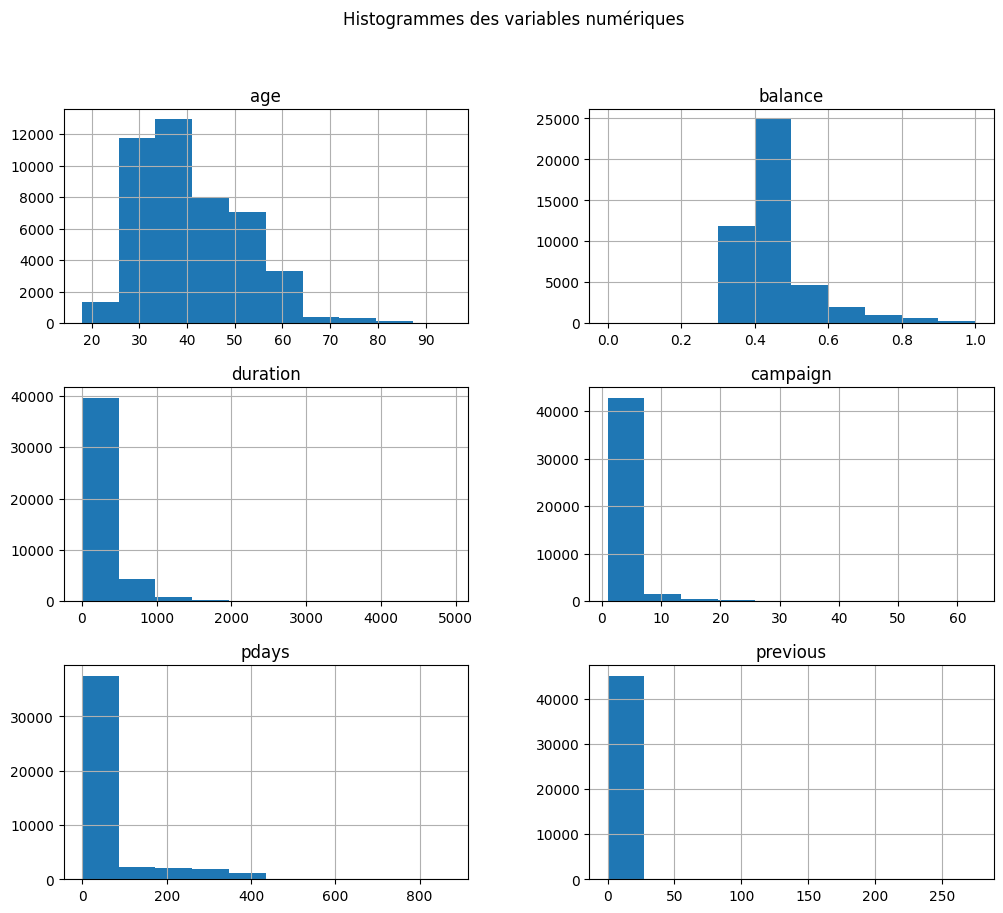

In [23]:
# Histogrammes des variables numériques
data.hist(figsize=(12, 10))
plt.suptitle("Histogrammes des variables numériques")
plt.show()


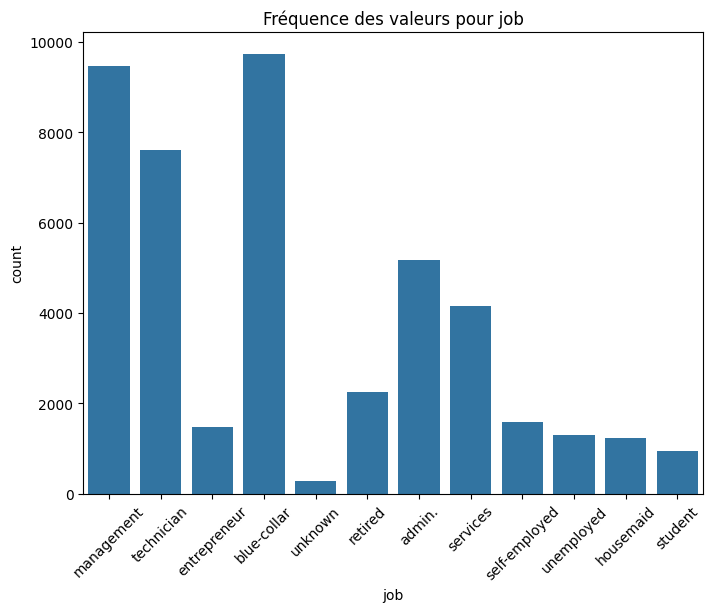

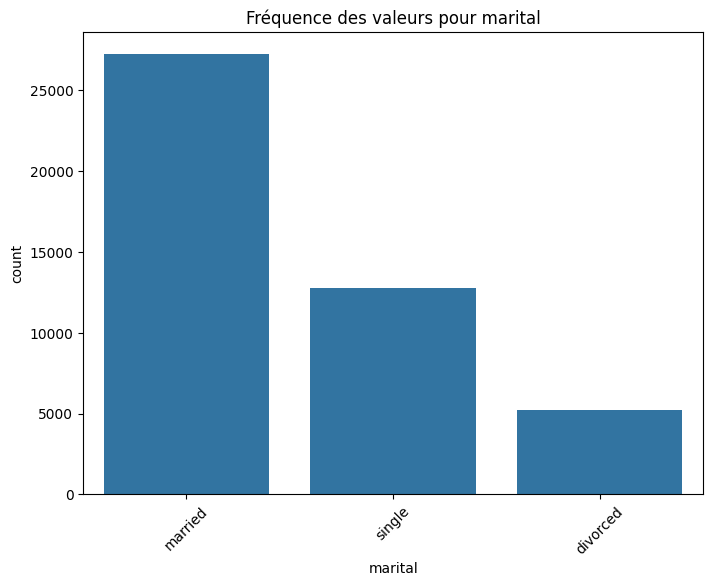

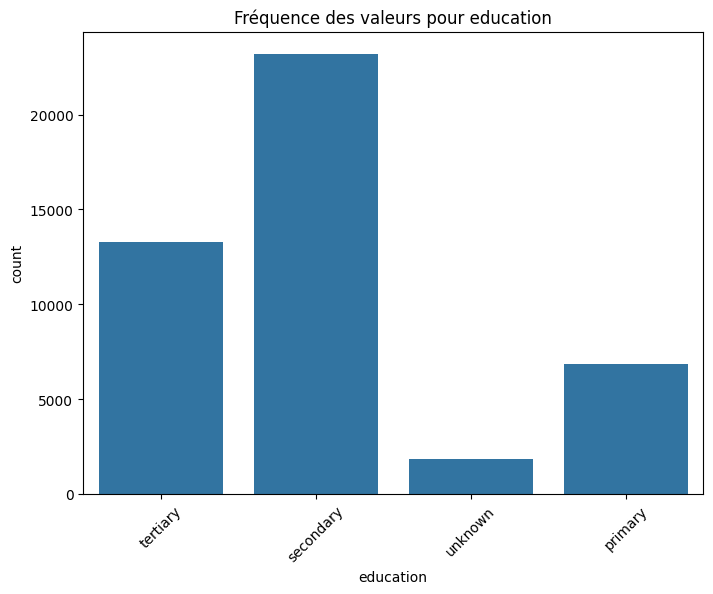

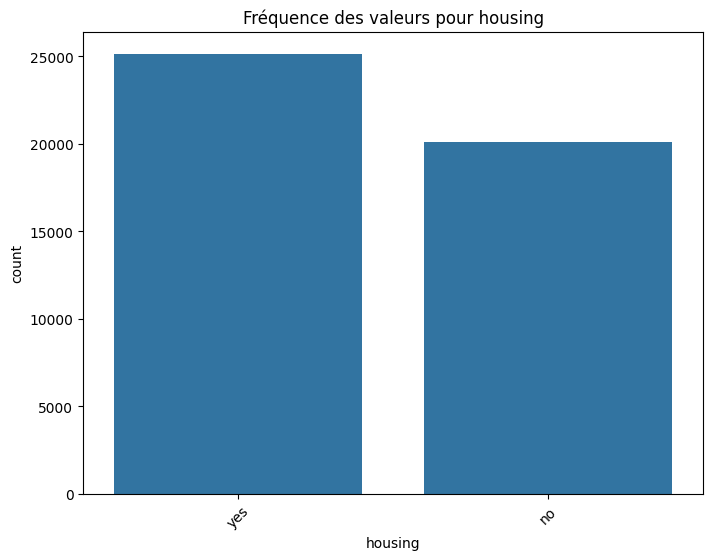

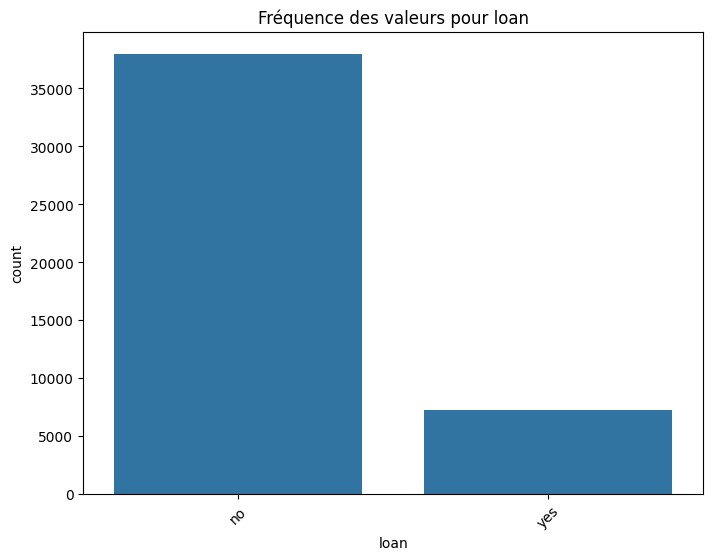

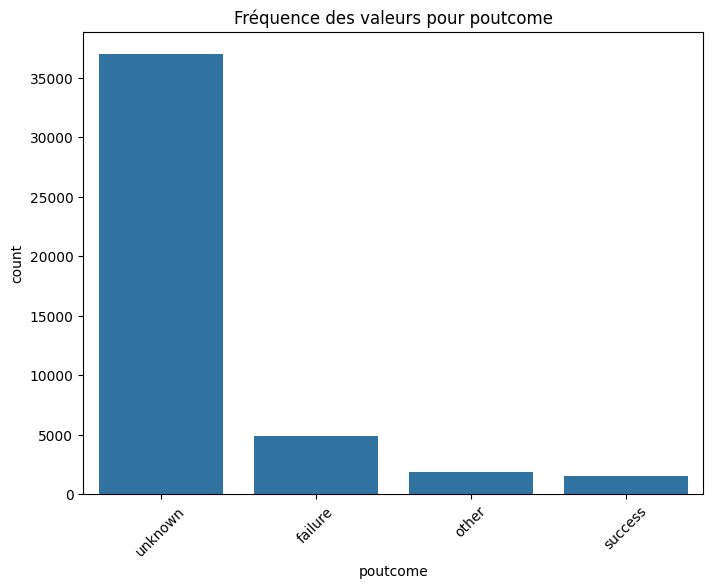

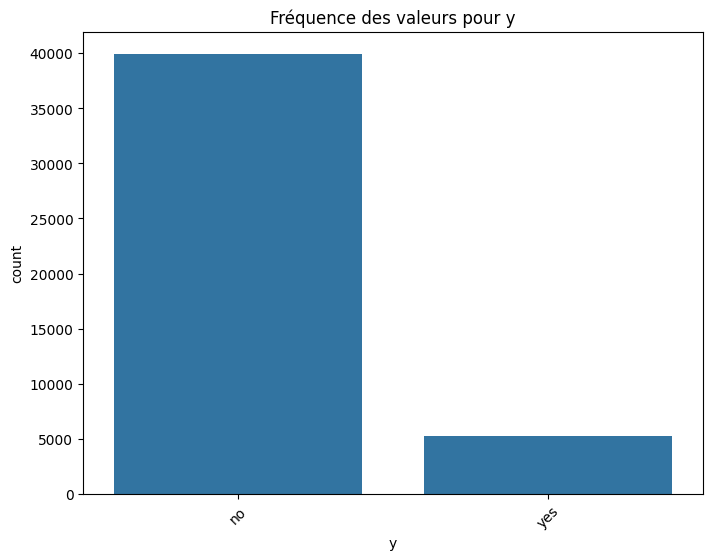

In [24]:
# Diagrammes à barres pour les variables catégoriques
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data)
    plt.title(f"Fréquence des valeurs pour {col}")
    plt.xticks(rotation=45)
    plt.show()

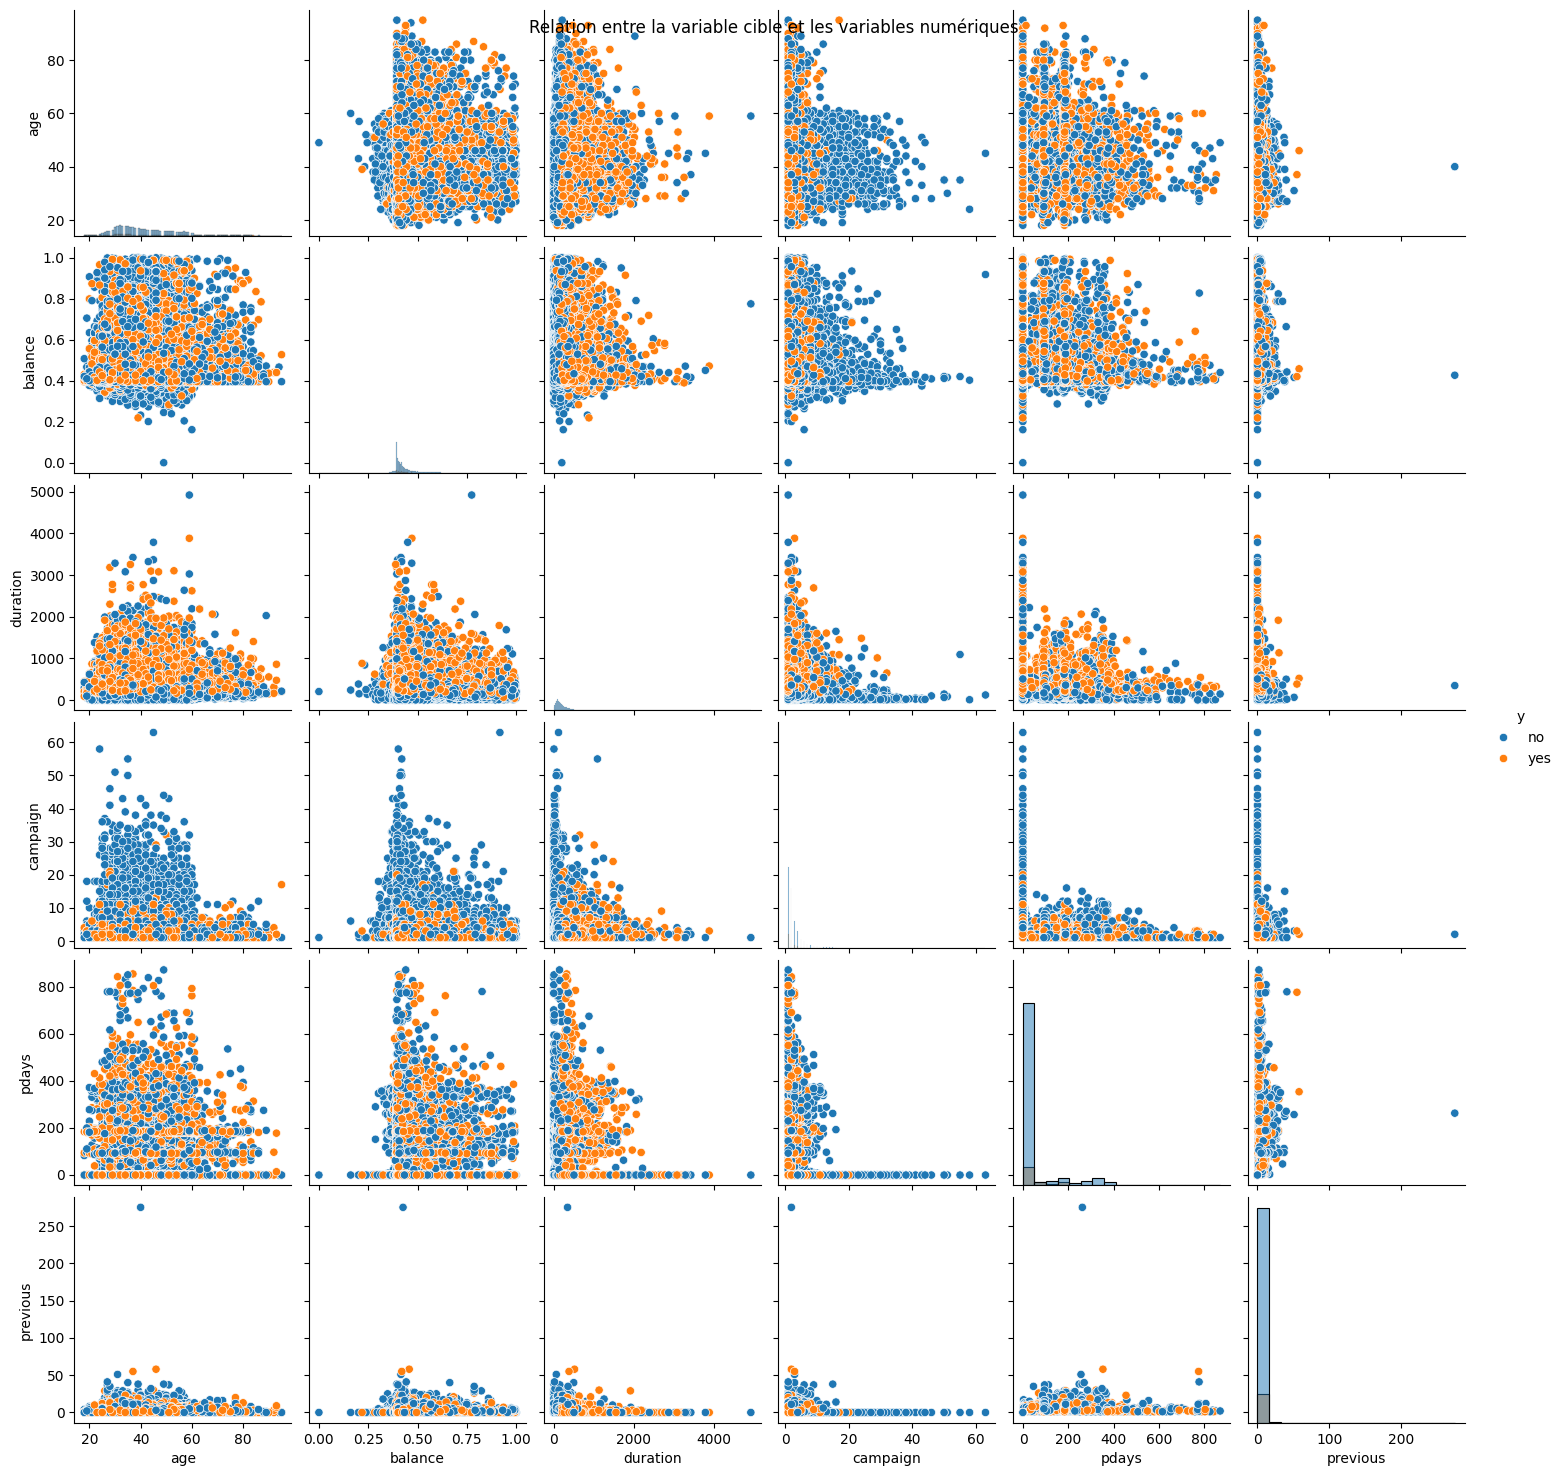

In [25]:
# Relation entre la variable cible 'y' et les variables numériques
sns.pairplot(data=data, vars=data.select_dtypes(include=['float64', 'int64']).columns, hue='y', diag_kind='hist')
plt.suptitle("Relation entre la variable cible et les variables numériques")
plt.show()


In [26]:
# Créer une instance de LabelEncoder
label_encoder = LabelEncoder()

# Encoder les variables catégoriques avec LabelEncoder
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Afficher les premières lignes pour vérification
print(data.head())

   age  job  marital  education   balance  housing  loan  duration  campaign  \
0   58    4        1          2  0.518754        1     0       261         1   
1   44    9        2          1  0.396769        1     0       151         1   
2   33    2        1          1  0.395211        1     1        76         1   
3   47    1        1          3  0.481997        1     0        92         1   
4   33   11        2          3  0.395153        0     0       198         1   

   pdays  previous  poutcome  y  
0     -1         0         3  0  
1     -1         0         3  0  
2     -1         0         3  0  
3     -1         0         3  0  
4     -1         0         3  0  


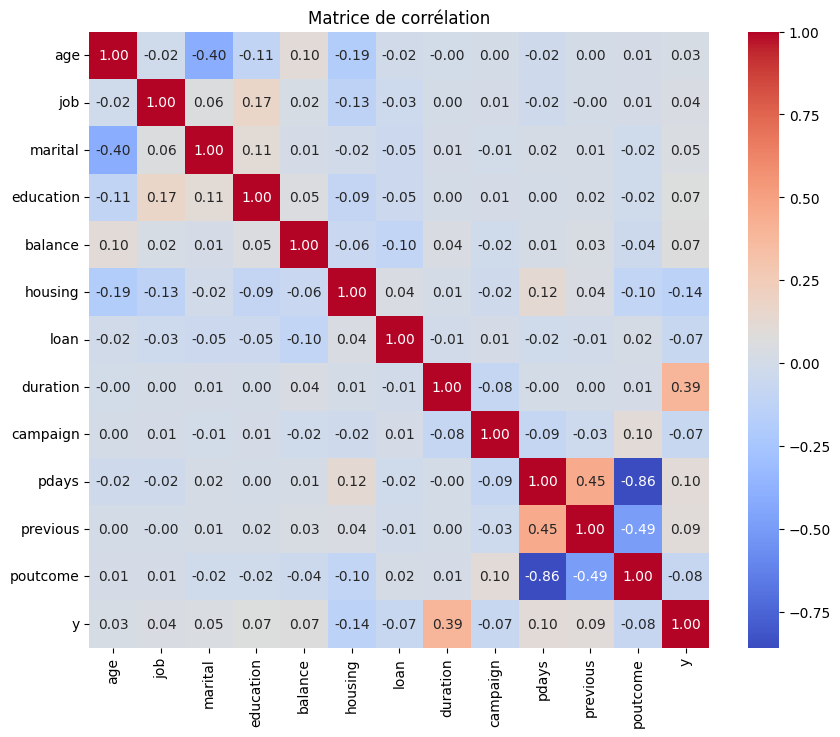

In [27]:
# Matrice de corrélation pour les variables numériques
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Diviser les données en X (variables indépendantes) et y (variable cible)
X = data.drop('y', axis=1)
y = data['y']

# Diviser les données en ensembles d'entraînement et de test (par exemple, 80% pour l'entraînement et 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le modèle de régression logistique
logreg_model = LogisticRegression(max_iter=1000)  # Vous pouvez ajuster max_iter selon la convergence du modèle

# Entraîner le modèle sur les données d'entraînement
logreg_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = logreg_model.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle de régression logistique : {accuracy:.2f}")

# Afficher le rapport de classification pour plus de détails sur les performances
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


Précision du modèle de régression logistique : 0.89

Rapport de classification :
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.59      0.21      0.30      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.59      0.62      9043
weighted avg       0.86      0.89      0.86      9043



/Users/mac/micromamba/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
